In [1]:
# the differences in the MCMC OU CODES is the parameters in the samplers and the kernels chosen for the chains
# The correct codes should be the ones where you see acceptance probability calculated

In [1]:
# another try without adding the meanf
import math
import random
import decimal
import scipy.linalg
import numpy.random as nrand 
import matplotlib.pyplot as plt
import gpflow
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
plt = matplotlib.pyplot

In [2]:
def ou_values(a,b,dt,sigma,time):
    #This method returns the rate levels of a mean-reverting ornstein uhlenbeck process.
    x = np.zeros(len(time))
    for i in range(0, len(time)-1):
        x[i+1]=x[i]+a*(b-x[i])*dt+math.sqrt(dt)*sigma*np.random.normal(0,1)
    return x

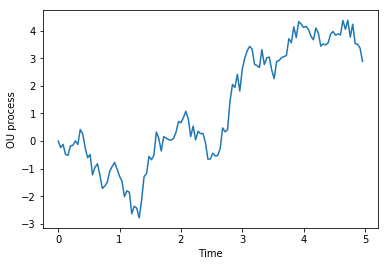

In [3]:
dt=0.04
time=np.arange(0,5,dt)# time
sigma=2
a=1# the coefficient in front, the rate
b=0# the mean
#Simulation of an OU process
x=ou_values(a,b,dt,sigma,time)# the first one is zero because param_all_r0 starts at 0
t=time# time vector
plt.plot(t,x)
plt.xlabel('Time')
plt.ylabel('OU process')
plt.show()

In [4]:
len(time)

125

In [5]:
t_column=t.reshape(-1,1)
x_column=x.reshape(-1,1)
k=gpflow.kernels.Matern12(1, lengthscales=10)
m = gpflow.models.GPR(t_column,x_column, k)
m.likelihood.variance = 0.1
m.kern.variance=1

In [6]:
m.clear()
m.kern.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
m.kern.variance.prior = gpflow.priors.Gamma(1., 1.)
m.likelihood.variance.prior = gpflow.priors.Gamma(1., 1.)
m.compile()
m.as_pandas_table()

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-7b68ea09-7/X/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-5-90e2af48dfd5>", line 4, in <module>
    m = gpflow.models.GPR(t_column,x_column, k)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _b

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-7b68ea09-7/X/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-5-90e2af48dfd5>", line 4, in <module>
    m = gpflow.models.GPR(t_column,x_column, k)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _b

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-7b68ea09-7/Y/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-5-90e2af48dfd5>", line 4, in <module>
    m = gpflow.models.GPR(t_column,x_column, k)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _b

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-7b68ea09-7/Y/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-5-90e2af48dfd5>", line 4, in <module>
    m = gpflow.models.GPR(t_column,x_column, k)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _b

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'Matern12-983c89ce-0/lengthscales/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-5-90e2af48dfd5>", line 3, in <module>
    k=gpflow.kernels.Matern12(1, lengthscales=10)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    self._prior_tensor = self._build_prior(priors)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gp

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'Matern12-983c89ce-0/lengthscales/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-5-90e2af48dfd5>", line 3, in <module>
    k=gpflow.kernels.Matern12(1, lengthscales=10)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    self._prior_tensor = self._build_prior(priors)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gp

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'Matern12-983c89ce-0/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-5-90e2af48dfd5>", line 3, in <module>
    k=gpflow.kernels.Matern12(1, lengthscales=10)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    self._prior_tensor = self._build_prior(priors)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'Matern12-983c89ce-0/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-5-90e2af48dfd5>", line 3, in <module>
    k=gpflow.kernels.Matern12(1, lengthscales=10)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    self._prior_tensor = self._build_prior(priors)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-7b68ea09-7/likelihood/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-5-90e2af48dfd5>", line 4, in <module>
    m = gpflow.models.GPR(t_column,x_column, k)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-7b68ea09-7/likelihood/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-5-90e2af48dfd5>", line 4, in <module>
    m = gpflow.models.GPR(t_column,x_column, k)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/lengthscales,Parameter,"Ga(1.0,1.0)",+ve,True,(),True,10.0
GPR/kern/variance,Parameter,"Ga(1.0,1.0)",+ve,True,(),True,1.0
GPR/likelihood/variance,Parameter,"Ga(1.0,1.0)",+ve,True,(),True,0.1


In [7]:
k1=gpflow.kernels.Matern12(1, lengthscales=5,variance=5)
m1 = gpflow.models.GPR(t_column,x_column, k1)
m1.likelihood.variance = 1# get this to be bigger

In [8]:
m1.clear()
m1.kern.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
m1.kern.variance.prior = gpflow.priors.Gamma(1., 1.)
m1.likelihood.variance.prior = gpflow.priors.Gamma(1., 1.)
m1.compile()
m1.as_pandas_table()

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-2ab91383-29/X/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-7-ce222e40c133>", line 2, in <module>
    m1 = gpflow.models.GPR(t_column,x_column, k1)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-2ab91383-29/X/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-7-ce222e40c133>", line 2, in <module>
    m1 = gpflow.models.GPR(t_column,x_column, k1)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-2ab91383-29/Y/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-7-ce222e40c133>", line 2, in <module>
    m1 = gpflow.models.GPR(t_column,x_column, k1)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-2ab91383-29/Y/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-7-ce222e40c133>", line 2, in <module>
    m1 = gpflow.models.GPR(t_column,x_column, k1)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'Matern12-6a2620ca-22/lengthscales/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-7-ce222e40c133>", line 1, in <module>
    k1=gpflow.kernels.Matern12(1, lengthscales=5,variance=5)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    self._prior_tensor = self._build_prior(priors)  File "C:\Users\Ionut\Anaconda3\lib\site

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'Matern12-6a2620ca-22/lengthscales/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-7-ce222e40c133>", line 1, in <module>
    k1=gpflow.kernels.Matern12(1, lengthscales=5,variance=5)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    self._prior_tensor = self._build_prior(priors)  File "C:\Users\Ionut\Anaconda3\lib\site

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'Matern12-6a2620ca-22/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-7-ce222e40c133>", line 1, in <module>
    k1=gpflow.kernels.Matern12(1, lengthscales=5,variance=5)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    self._prior_tensor = self._build_prior(priors)  File "C:\Users\Ionut\Anaconda3\lib\site-pac

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'Matern12-6a2620ca-22/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-7-ce222e40c133>", line 1, in <module>
    k1=gpflow.kernels.Matern12(1, lengthscales=5,variance=5)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    self._prior_tensor = self._build_prior(priors)  File "C:\Users\Ionut\Anaconda3\lib\site-pac

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-2ab91383-29/likelihood/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-7-ce222e40c133>", line 2, in <module>
    m1 = gpflow.models.GPR(t_column,x_column, k1)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-2ab91383-29/likelihood/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-7-ce222e40c133>", line 2, in <module>
    m1 = gpflow.models.GPR(t_column,x_column, k1)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/lengthscales,Parameter,"Ga(1.0,1.0)",+ve,True,(),True,5.0
GPR/kern/variance,Parameter,"Ga(1.0,1.0)",+ve,True,(),True,5.0
GPR/likelihood/variance,Parameter,"Ga(1.0,1.0)",+ve,True,(),True,1.0


In [9]:
k2=gpflow.kernels.Matern12(1, lengthscales=20,variance=10)
m2 = gpflow.models.GPR(t_column,x_column, k2)
m2.likelihood.variance = 2# get this to be bigger

In [10]:
m2.clear()
m2.kern.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
m2.kern.variance.prior = gpflow.priors.Gamma(1., 1.)
m2.likelihood.variance.prior = gpflow.priors.Gamma(1., 1.)
m2.compile()
m2.as_pandas_table()

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-d21c199a-51/X/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-9-403e196005f4>", line 2, in <module>
    m2 = gpflow.models.GPR(t_column,x_column, k2)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-d21c199a-51/X/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-9-403e196005f4>", line 2, in <module>
    m2 = gpflow.models.GPR(t_column,x_column, k2)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-d21c199a-51/Y/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-9-403e196005f4>", line 2, in <module>
    m2 = gpflow.models.GPR(t_column,x_column, k2)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-d21c199a-51/Y/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-9-403e196005f4>", line 2, in <module>
    m2 = gpflow.models.GPR(t_column,x_column, k2)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'Matern12-dbacb6a2-44/lengthscales/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-9-403e196005f4>", line 1, in <module>
    k2=gpflow.kernels.Matern12(1, lengthscales=20,variance=10)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    self._prior_tensor = self._build_prior(priors)  File "C:\Users\Ionut\Anaconda3\lib\si

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'Matern12-dbacb6a2-44/lengthscales/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-9-403e196005f4>", line 1, in <module>
    k2=gpflow.kernels.Matern12(1, lengthscales=20,variance=10)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    self._prior_tensor = self._build_prior(priors)  File "C:\Users\Ionut\Anaconda3\lib\si

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'Matern12-dbacb6a2-44/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-9-403e196005f4>", line 1, in <module>
    k2=gpflow.kernels.Matern12(1, lengthscales=20,variance=10)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    self._prior_tensor = self._build_prior(priors)  File "C:\Users\Ionut\Anaconda3\lib\site-p

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'Matern12-dbacb6a2-44/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-9-403e196005f4>", line 1, in <module>
    k2=gpflow.kernels.Matern12(1, lengthscales=20,variance=10)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized.py", line 302, in _build
    self._prior_tensor = self._build_prior(priors)  File "C:\Users\Ionut\Anaconda3\lib\site-p

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-d21c199a-51/likelihood/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-9-403e196005f4>", line 2, in <module>
    m2 = gpflow.models.GPR(t_column,x_column, k2)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'GPR-d21c199a-51/likelihood/variance/IsVariableInitialized:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\Ionut\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3285, in run_code
    return outflag  File "<ipython-input-9-403e196005f4>", line 2, in <module>
    m2 = gpflow.models.GPR(t_column,x_column, k2)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\compilable.py", line 91, in __init__
    self.initialize(force=True)  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\core\node.py", line 156, in build
    self._build()  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\models\model.py", line 83, in _build
    self._objective = objective  File "C:\Users\Ionut\Anaconda3\lib\site-packages\gpflow\params\parameterized

,class,prior,transform,trainable,shape,fixed_shape,value
GPR/kern/lengthscales,Parameter,"Ga(1.0,1.0)",+ve,True,(),True,20.0
GPR/kern/variance,Parameter,"Ga(1.0,1.0)",+ve,True,(),True,10.0
GPR/likelihood/variance,Parameter,"Ga(1.0,1.0)",+ve,True,(),True,2.0


In [11]:
sampler = gpflow.train.HMC()
samples = sampler.sample(m, num_samples=5000, epsilon=0.005,logprobs=True,lmin=8, lmax=10, burn=1000,thin=20)
print('acceptance rate: ', len(set(samples.logprobs))/len(samples.logprobs))
samples = samples.drop('logprobs', axis=1)

acceptance rate:  0.9872


Text(0, 0.5, 'parameter value')

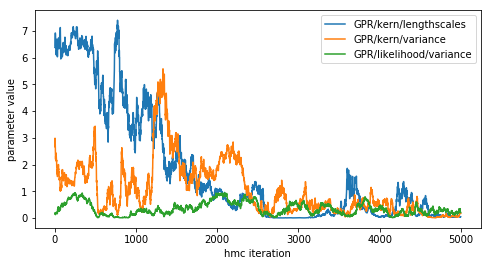

In [12]:
plt.figure(figsize=(8,4))
for i, col in samples.iteritems():
    plt.plot(col, label=col.name)
plt.legend(loc=0)
plt.xlabel('hmc iteration')
plt.ylabel('parameter value')

Text(0, 0.5, 'signal_variance')

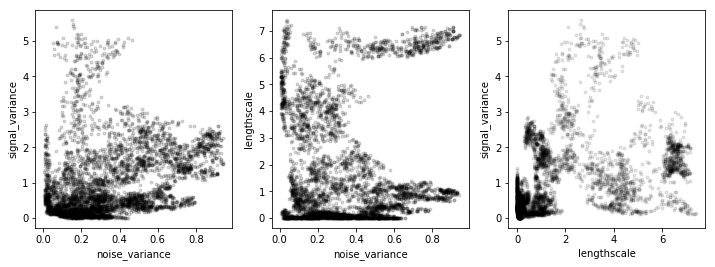

In [13]:
f, axs = plt.subplots(1,3, figsize=(12,4))

axs[0].plot(samples['GPR/likelihood/variance'],
            samples['GPR/kern/variance'], 'k.', alpha = 0.15)
axs[0].set_xlabel('noise_variance')
axs[0].set_ylabel('signal_variance')

axs[1].plot(samples['GPR/likelihood/variance'],
            samples['GPR/kern/lengthscales'], 'k.', alpha = 0.15)
axs[1].set_xlabel('noise_variance')
axs[1].set_ylabel('lengthscale')

axs[2].plot(samples['GPR/kern/lengthscales'],
            samples['GPR/kern/variance'], 'k.', alpha = 0.1)
axs[2].set_xlabel('lengthscale')
axs[2].set_ylabel('signal_variance')

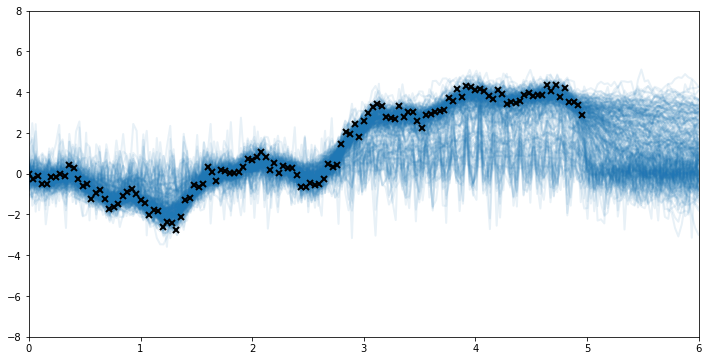

In [14]:
#plot the function posterior
xx = np.linspace(0, 6, 200)[:,None]
plt.figure(figsize=(12, 6))
for i, s in samples.iloc[::20].iterrows():
    f = m.predict_f_samples(xx, 1, initialize=False, feed_dict=m.sample_feed_dict(s))
    plt.plot(xx, f[0,:,:], 'C0', lw=2, alpha=0.1)
    
plt.plot(t, x, 'kx', mew=2)
_ = plt.xlim(xx.min(), xx.max())
_ = plt.ylim(-8, 8)

In [15]:
sampler1 = gpflow.train.HMC()
samples1 = sampler1.sample(m1, num_samples=5000, epsilon=0.005,logprobs=True,lmin=8, lmax=10, burn=1000,thin=20)
print('acceptance rate: ', len(set(samples1.logprobs))/len(samples1.logprobs))
samples1 = samples1.drop('logprobs', axis=1)

acceptance rate:  0.8698


Text(0, 0.5, 'parameter value')

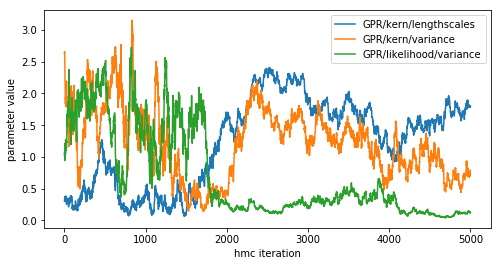

In [16]:
plt.figure(figsize=(8,4))
for i, col in samples1.iteritems():
    plt.plot(col, label=col.name)
plt.legend(loc=0)
plt.xlabel('hmc iteration')
plt.ylabel('parameter value')

Text(0, 0.5, 'signal_variance')

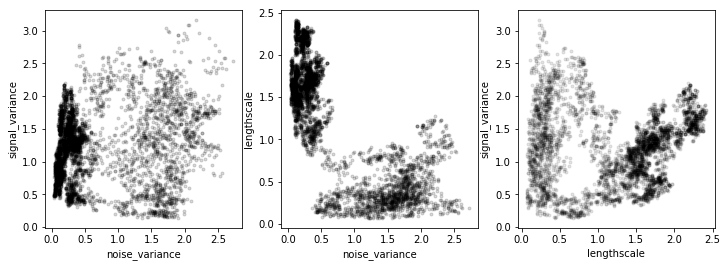

In [17]:
f, axs = plt.subplots(1,3, figsize=(12,4))

axs[0].plot(samples1['GPR/likelihood/variance'],
            samples1['GPR/kern/variance'], 'k.', alpha = 0.15)
axs[0].set_xlabel('noise_variance')
axs[0].set_ylabel('signal_variance')

axs[1].plot(samples1['GPR/likelihood/variance'],
            samples1['GPR/kern/lengthscales'], 'k.', alpha = 0.15)
axs[1].set_xlabel('noise_variance')
axs[1].set_ylabel('lengthscale')

axs[2].plot(samples1['GPR/kern/lengthscales'],
            samples1['GPR/kern/variance'], 'k.', alpha = 0.1)
axs[2].set_xlabel('lengthscale')
axs[2].set_ylabel('signal_variance')

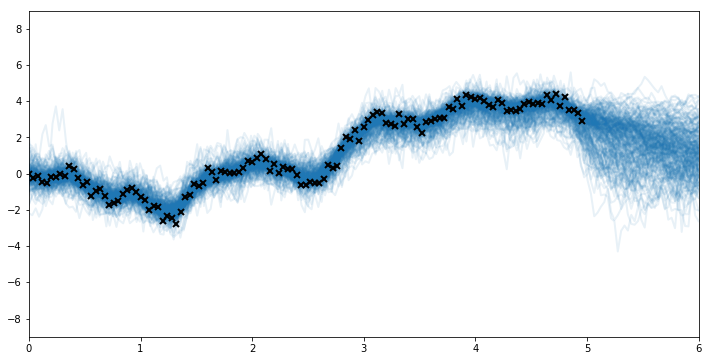

In [18]:
#plot the function posterior
xx = np.linspace(0, 6, 200)[:,None]
plt.figure(figsize=(12, 6))
for i, s in samples1.iloc[::20].iterrows():
    f = m1.predict_f_samples(xx, 1, initialize=False, feed_dict=m1.sample_feed_dict(s))
    plt.plot(xx, f[0,:,:], 'C0', lw=2, alpha=0.1)
    
plt.plot(t, x, 'kx', mew=2)
_ = plt.xlim(xx.min(), xx.max())
_ = plt.ylim(-9, 9)

In [19]:
sampler2 = gpflow.train.HMC()
samples2 = sampler2.sample(m2, num_samples=5000, epsilon=0.001,logprobs=True,lmin=8, lmax=10, burn=1000,thin=20)
print('acceptance rate: ', len(set(samples2.logprobs))/len(samples2.logprobs))
samples2 = samples2.drop('logprobs', axis=1)

acceptance rate:  1.0


Text(0, 0.5, 'parameter value')

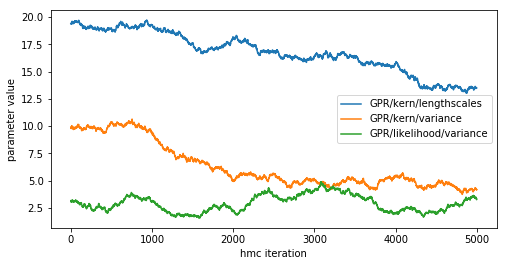

In [20]:
plt.figure(figsize=(8,4))
for i, col in samples2.iteritems():
    plt.plot(col, label=col.name)
plt.legend(loc=0)
plt.xlabel('hmc iteration')
plt.ylabel('parameter value')

Text(0, 0.5, 'signal_variance')

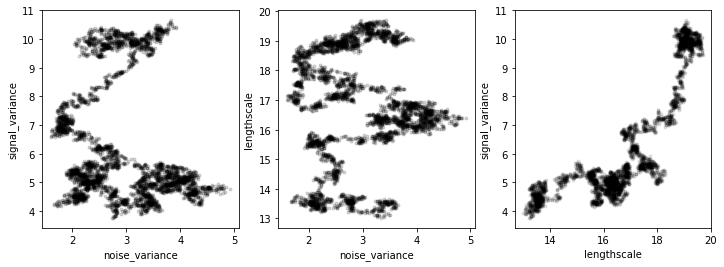

In [21]:
f, axs = plt.subplots(1,3, figsize=(12,4))

axs[0].plot(samples2['GPR/likelihood/variance'],
            samples2['GPR/kern/variance'], 'k.', alpha = 0.15)
axs[0].set_xlabel('noise_variance')
axs[0].set_ylabel('signal_variance')

axs[1].plot(samples2['GPR/likelihood/variance'],
            samples2['GPR/kern/lengthscales'], 'k.', alpha = 0.15)
axs[1].set_xlabel('noise_variance')
axs[1].set_ylabel('lengthscale')

axs[2].plot(samples2['GPR/kern/lengthscales'],
            samples2['GPR/kern/variance'], 'k.', alpha = 0.1)
axs[2].set_xlabel('lengthscale')
axs[2].set_ylabel('signal_variance')

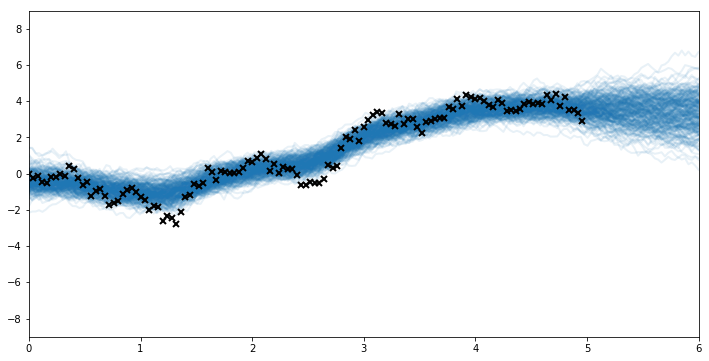

In [22]:
#plot the function posterior
xx = np.linspace(0, 6, 200)[:,None]
plt.figure(figsize=(12, 6))
for i, s in samples2.iloc[::20].iterrows():
    f = m2.predict_f_samples(xx, 1, initialize=False, feed_dict=m2.sample_feed_dict(s))
    plt.plot(xx, f[0,:,:], 'C0', lw=2, alpha=0.1)
    
plt.plot(t, x, 'kx', mew=2)
_ = plt.xlim(xx.min(), xx.max())
_ = plt.ylim(-9, 9)

In [23]:
# Gelman-Rubin Statistic calculated for the three parameters
#first chain
variance_vector=samples['GPR/kern/variance'].values# works works works !!!!
lengthscales_vector=samples['GPR/kern/lengthscales'].values
likelihood_variance_vector=samples['GPR/likelihood/variance'].values
#second chain
variance_vector1=samples1['GPR/kern/variance'].values# works works works !!!!
lengthscales_vector1=samples1['GPR/kern/lengthscales'].values
likelihood_variance_vector1=samples1['GPR/likelihood/variance'].values
# third chain
variance_vector2=samples2['GPR/kern/variance'].values# works works works !!!!
lengthscales_vector2=samples2['GPR/kern/lengthscales'].values
likelihood_variance_vector2=samples2['GPR/likelihood/variance'].values
# create a list with all the three chains wrt each parameter in turn
l_variance=[]
l_lengthscales=[]
l_likelihood_variance=[]
# append the vectors
#variance_vectors
l_variance.append(variance_vector)
l_variance.append(variance_vector1)
l_variance.append(variance_vector2)
#lengthscales_vectors
l_lengthscales.append(lengthscales_vector)
l_lengthscales.append(lengthscales_vector1)
l_lengthscales.append(lengthscales_vector2)
#likelihood_variance_vectors
l_likelihood_variance.append(likelihood_variance_vector)
l_likelihood_variance.append(likelihood_variance_vector1)
l_likelihood_variance.append(likelihood_variance_vector2)


In [24]:
# x: data cell array
# m: no of chains run
# Within Chain Variance 
m=3
ssq_variance = np.zeros(m)
ssq_lengthscales=np.zeros(m)
ssq_likelihood_variance=np.zeros(m)
for j in range(0,m):
    ssq_variance[j]=np.var(l_variance[j])
for j in range(0,m):
    ssq_lengthscales[j]=np.var(l_lengthscales[j])    
for j in range(0,m):
    ssq_likelihood_variance[j]=np.var(l_likelihood_variance[j])    
        
    
Wvar_variance = np.mean(ssq_variance)
Wvar_lengthscales=np.mean(ssq_lengthscales)
Wvar_likelihood_variance=np.mean(ssq_likelihood_variance)

In [25]:
# Between Chain Variance
schain_variance,schain_lengthscales,schain_likelihood_variance = 0,0,0
chainlng_variance=len(l_variance[0])
chainlng_lengthscales=len(l_lengthscales[0])
chainlng_likelihood_variance=len(l_likelihood_variance[0])
for j in range(0,m):
    schain_variance = schain_variance + np.mean(l_variance[j]) # sum of all chain means
    schain_lengthscales = schain_lengthscales + np.mean(l_lengthscales[j])
    schain_likelihood_variance=schain_likelihood_variance+np.mean(l_likelihood_variance[j])

mubar2_variance = (1/m)*schain_variance
mubar2_lengthscales = (1/m)*schain_lengthscales
mubar2_likelihood_variance = (1/m)*schain_likelihood_variance
bs_variance,bs_lengthscales,bs_likelihood_variance=0,0,0

for j in range(0,m):
    bs_variance=bs_variance+(np.mean(l_variance[j])-mubar2_variance)**2
    bs_lengthscales=bs_lengthscales+(np.mean(l_lengthscales[j])-mubar2_lengthscales)**2
    bs_likelihood_variance=bs_likelihood_variance+np.mean(l_likelihood_variance[j]-mubar2_likelihood_variance )**2

Bvar_variance = (chainlng_variance/(m-1))*bs_variance # all chains have the same length
Bvar_lengthscales = (chainlng_lengthscales/(m-1))*bs_lengthscales
Bvar_likelihood_variance = (chainlng_likelihood_variance/(m-1))*bs_likelihood_variance

# Estimated variance
muvar_variance = (1-1/chainlng_variance)*Wvar_variance + (1/chainlng_variance)*Bvar_variance
muvar_lengthscales = (1-1/chainlng_lengthscales)*Wvar_lengthscales+ (1/chainlng_lengthscales)*Bvar_lengthscales
muvar_likelihood_variance = (1-1/chainlng_likelihood_variance)*Wvar_likelihood_variance + (1/chainlng_likelihood_variance)*Bvar_likelihood_variance

# Potential Scale Reduction Factor
R_variance = np.sqrt(muvar_variance/Wvar_variance)
R_lengthscales = np.sqrt(muvar_lengthscales/Wvar_lengthscales) 
R_likelihood_variance = np.sqrt(muvar_likelihood_variance/Wvar_likelihood_variance) 

print(R_variance)
print(R_lengthscales)# smaller than 1.1, so the chain has converged.
print(R_likelihood_variance)# smaller than 1.1, so the chain has converged.

2.412243030528613
5.282874045917437
2.521518040999388
